# Beers

### Dependencies

In [1]:
# Suppress FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Dependencies
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
from pathlib import Path

# Yearly US Beer Consumption On Premise Use
## 2020 - 2023
---
## These statistics were calculated using the following sources:
#### For excise tax rates - NIAAA (National Institute on Alcohol Abuse and Alcoholism)
#### For state population data - 2020 Census
#### For beer tax premise use - TTB (Alcohol and Tobacco Tax Trade Bureau)
    Between the Years of 2020 to 2023, beer consumption in the US peaked in 2022.
    The state with the largest taxable premise use per capita was Wyoming.
    The state with the smallest taxable premise use per capita was Mississippi.
---
## This author's interpretation of 'taxable premise use' is based on the taxes paid for purchases made in the state.
---
    Calculations were made as an aggregate of the 2020 to 2023 data
    (taxes owed for on premise use) / (population) / (cost per gallon)
---



In [2]:
# Read CSV excise tax File
Excise_Tax_file = Path("../Data/NIAAA_Data/excise_tax.csv")
Excise_Tax_file_df = pd.read_csv(Excise_Tax_file)
Excise_Tax_file_df.head()

,Jurisdiction,Excise Tax Per Gallon
0,Alabama,1.05
1,Alaska,1.07
2,Arizona,0.16
3,Arkansas,0.24
4,California,0.20


In [3]:
# Read CSV Population File
State_Population_Report_file = Path("../Data/Population_Data/Census.csv")
State_Population_Report_df = pd.read_csv(State_Population_Report_file)
State_Population_Report_df.head()

,State,2020,2021,2022,2023
0,Alabama,5031864,5050380,5073903,5108468
1,Alaska,732964,734923,733276,733406
2,Arizona,7186683,7272487,7365684,7431344
3,Arkansas,3014348,3028443,3046404,3067732
4,California,39503200,39145060,39040616,38965193


In [4]:
# Read CSV Production File
State_Production_Report_file = Path("../Data/TTB_Quarterly_Rpt/State_Beer_Report_2020-2023.csv")
State_Production_Report_df = pd.read_csv(State_Production_Report_file)

top_ten_states = State_Production_Report_df.groupby(['STATE'])['Tax-Determined Premises Use'].sum()
State_Production_grouped_df = top_ten_states.reset_index()
top_ten_states = top_ten_states.sort_values(ascending=False)
bottom_ten_states = pd.DataFrame(top_ten_states.sort_values(ascending=True))
top_ten_states = pd.DataFrame(top_ten_states.head(10).reset_index())

bottom_ten_states.head()

,Tax-Determined Premises Use
STATE,
Mississippi,26688.87
West Virginia,32190.91
Hawaii,38446.76
South Dakota,45222.85
North Dakota,48967.00


In [5]:
np.seterr(divide='ignore', invalid='ignore')
popspan_2020_2023_df = pd.DataFrame({'State':[],'Population 2020 to 2023':[], 'Tax-Determined Per Capita':[], 'Tax Per Gallon':[]})

for state in State_Population_Report_df['State']:
    pop_2020 = pd.DataFrame(State_Population_Report_df.loc[(State_Population_Report_df['State'] == state), ['2020']]).sum()
    pop_2021 = pd.DataFrame(State_Population_Report_df.loc[(State_Population_Report_df['State'] == state), ['2021']]).sum()
    pop_2022 = pd.DataFrame(State_Population_Report_df.loc[(State_Population_Report_df['State'] == state), ['2022']]).sum()
    pop_2023 = pd.DataFrame(State_Population_Report_df.loc[(State_Population_Report_df['State'] == state), ['2023']]).sum()

    pop_2020 = pop_2020.sum()
    pop_2021 = pop_2021.sum()
    pop_2022 = pop_2022.sum()
    pop_2023 = pop_2023.sum()

    tax_per_gallon = Excise_Tax_file_df.loc[(Excise_Tax_file_df['Jurisdiction'] == state)]['Excise Tax Per Gallon']
    tax_per_gallon = tax_per_gallon.sum()

    tax_sum = State_Production_grouped_df.loc[(State_Production_grouped_df['STATE'] == state)]['Tax-Determined Premises Use']
    tax_sum = tax_sum.sum()
    consume_capita = tax_sum / tax_per_gallon
    consume_capita = consume_capita / (pop_2020 + pop_2021 + pop_2022 + pop_2023) 

    
    popspan_2020_2023_df.loc[len(popspan_2020_2023_df)] = {'State':state, 
                                                           'Population 2020 to 2023':pop_2020 + pop_2021 + pop_2022 + pop_2023,
                                                           'Tax-Determined Per Capita':consume_capita,
                                                           'Tax Per Gallon':tax_per_gallon}
    

# top_ten_states = top_ten_states.sort_values(ascending=False)
popspan_2020_2023_df = popspan_2020_2023_df.sort_values(by=['Tax-Determined Per Capita'], ascending=False)
popspan_top_ten_2020_2023_df = pd.DataFrame(popspan_2020_2023_df.head(10).reset_index())
popspan_top_ten_2020_2023_df

,index,State,Population 2020 to 2023,Tax-Determined Per Capita,Tax Per Gallon
0,50,Wyoming,2322898,1.260515,0.02
1,37,Oregon,16974246,0.400264,0.08
2,49,Wisconsin,23578176,0.381338,0.06
3,5,Colorado,23315464,0.360010,0.08
4,26,Montana,4449267,0.292863,0.14
5,39,Rhode Island,4383340,0.218838,0.11
6,45,Vermont,2584603,0.173154,0.27
7,19,Maine,5528364,0.135156,0.35
8,29,New Hampshire,5567253,0.125032,0.30
9,23,Minnesota,22880761,0.119349,0.15


In [6]:
# bottom_ten_states = top_ten_states.sort_values(ascending=False)
popspan_2020_2023_df = popspan_2020_2023_df.sort_values(by=['Tax-Determined Per Capita'], ascending=True)
popspan_bottom_ten_2020_2023_df = pd.DataFrame(popspan_2020_2023_df.head(10).reset_index())
popspan_bottom_ten_2020_2023_df

,index,State,Population 2020 to 2023,Tax-Determined Per Capita,Tax Per Gallon
0,24,Mississippi,11786609,0.005266,0.43
1,11,Hawaii,5772463,0.007162,0.93
2,0,Alabama,20264615,0.007198,1.05
3,42,Tennessee,28065265,0.008572,1.29
4,10,Georgia,43465152,0.009361,1.01
5,40,South Carolina,20982509,0.013275,0.77
6,9,Florida,88278254,0.016379,0.48
7,36,Oklahoma,16029963,0.020532,0.40
8,47,Washington,31063356,0.021881,0.76
9,16,Kansas,11753332,0.023788,0.18


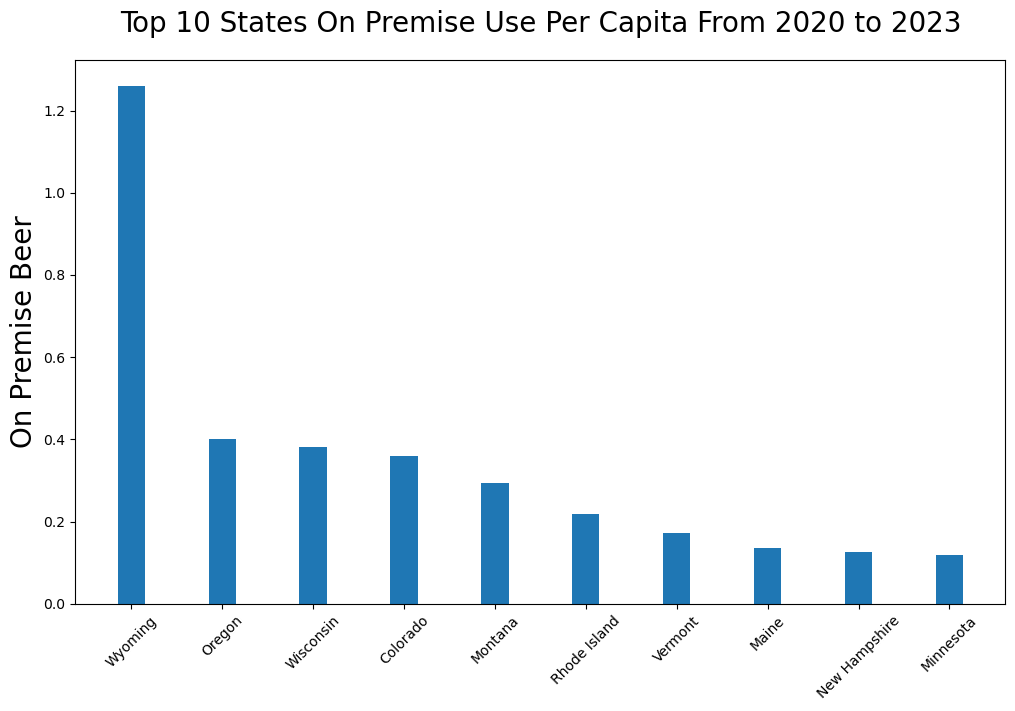

In [7]:
# Plot stacked bar by state

plt.figure(figsize=(12, 8))
plt.bar(popspan_top_ten_2020_2023_df['State'], popspan_top_ten_2020_2023_df['Tax-Determined Per Capita'], width=0.3)
plt.title("Top 10 States On Premise Use Per Capita From 2020 to 2023", fontsize = 20, pad=20)
plt.ylabel("On Premise Beer", fontsize = 20) 
plt.xticks(rotation=45)

# Save the figure
plt.subplots_adjust(bottom=0.2)
plt.savefig("../Outputs/Top_10_States_Consumption.png")

plt.show()

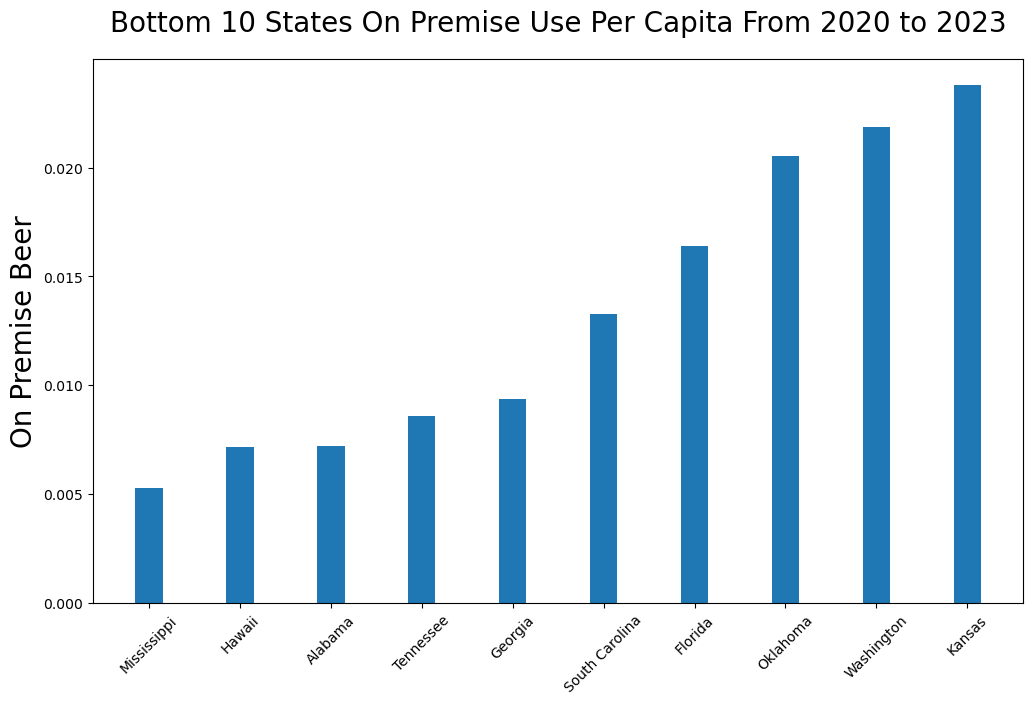

In [8]:
# Plot stacked bar by state

plt.figure(figsize=(12, 8))
plt.bar(popspan_bottom_ten_2020_2023_df['State'], popspan_bottom_ten_2020_2023_df['Tax-Determined Per Capita'], width=0.3)
plt.title("Bottom 10 States On Premise Use Per Capita From 2020 to 2023", fontsize = 20, pad=20)
plt.ylabel("On Premise Beer", fontsize = 20) 
plt.xticks(rotation=45)

# Save the figure
plt.subplots_adjust(bottom=0.2)
plt.savefig("../Outputs/Bottom_10_States_Consumption.png")

plt.show()

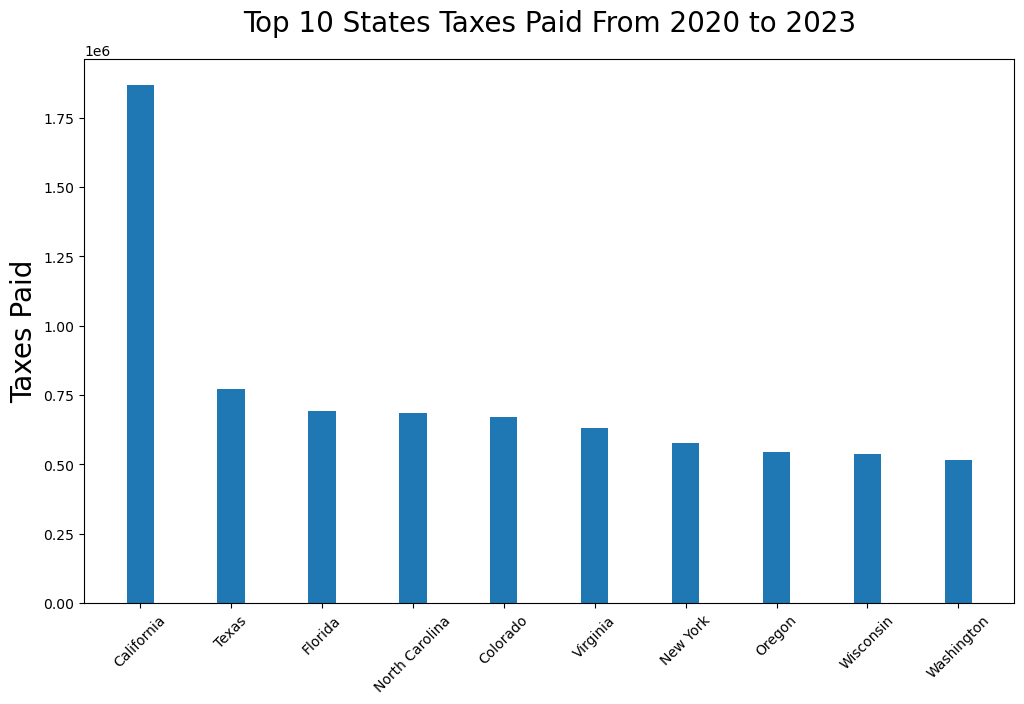

In [9]:
# Plot stacked bar by state

plt.figure(figsize=(12, 8))
plt.bar(top_ten_states['STATE'], top_ten_states['Tax-Determined Premises Use'], width=0.3)
plt.title("Top 10 States Taxes Paid From 2020 to 2023", fontsize = 20, pad=20)
plt.ylabel("Taxes Paid", fontsize = 20) 
plt.xticks(rotation=45)

# Save the figure
plt.subplots_adjust(bottom=0.2)
plt.savefig("../Outputs/Top_10_States_Taxes.png")

plt.show()

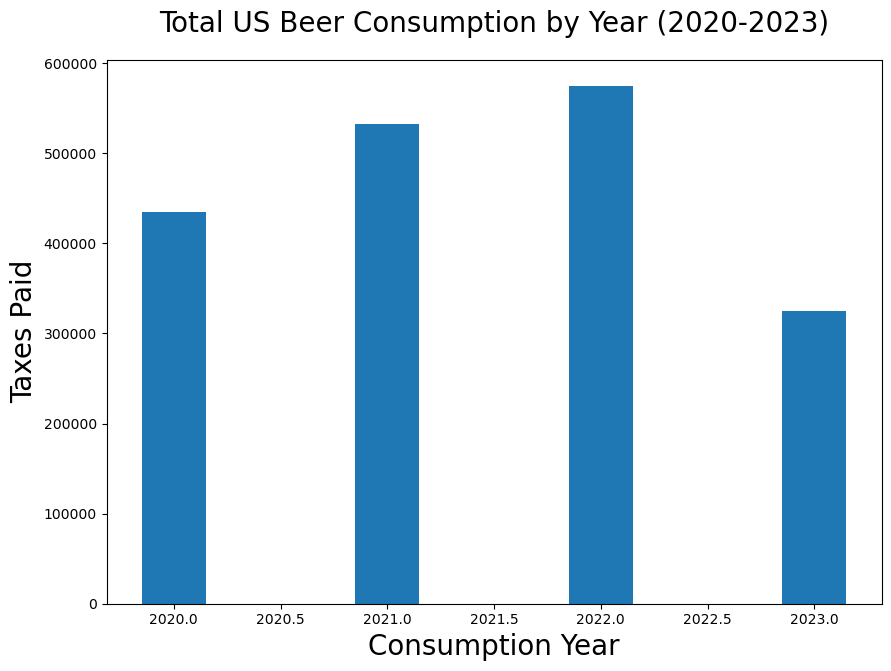

In [10]:
# Plot total all statea

plt.figure(figsize=(10, 8))

plt.bar(State_Production_Report_df['Year'], State_Production_Report_df['Tax-Determined Premises Use'], width=0.3)  
plt.title("Total US Beer Consumption by Year (2020-2023)", fontsize = 20, pad=20)
plt.xlabel("Consumption Year", fontsize = 20)
plt.ylabel("Taxes Paid", fontsize = 20) 

# Save the figure
plt.subplots_adjust(bottom=0.2)
plt.savefig("../Outputs/Total_US_Beer_Consumption.png")

plt.show()

# Sample DataFrame of breweries per state

## Create DataFrame for https://api.openbrewerydb.org/v1/breweries

In [11]:
beer_info_df = pd.DataFrame({'id':[],'name':[],'brewery_type':[],'address_1':[],'address_2':[],'address_3':[],
                             'city':[],'state_province':[],'postal_code':[],'country':[],'longitude':[],'latitude':[],
                             'phone':[],'website_url':[],'state':[],'street':[]})

In [12]:
try:
    page_count = int(9000 / 200)
    # page_count = 5 #testing
    for i in range(page_count):
        time.sleep(.5)
        path = f"https://api.openbrewerydb.org/v1/breweries?per_page=200&page={str(i)}"
        # print(req)
        beer_info = req.get(path).json()
        beer_info = pd.DataFrame(beer_info)
        beer_info_df = pd.concat([beer_info_df, beer_info], ignore_index=True)
except:
    print(f'Stopped at {i} pages')

In [13]:
beer_info_df.sample()

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
1293,05a8d9a8-670a-4e5d-86c3-fddd352cfe43,Blue Ridge Brewing Co/Foothills Brewing,brewpub,308 Trade St,None,None,Greer,South Carolina,29651-3432,United States,-82.2262648,34.9361559,8642324677,http://www.blueridgebrewing.com,South Carolina,308 Trade St


In [14]:
# delete duplicates
dup_data = beer_info_df[['id']]
dup_data_beer_info = dup_data[dup_data.duplicated()]['id'].unique()

In [15]:
beer_info_df = beer_info_df.set_index('id').drop(dup_data_beer_info).reset_index()
beer_info_df.sort_values(by=['country']).sample()

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
1347,e528714d-4002-4d80-8415-a8cf895ed4ab,Burnt Timber Brewing,brewpub,96 Lehner St,None,None,Wolfeboro,New Hampshire,03894,United States,-71.20968924,43.58632316,6036303605,http://www.burnttimbertavern.com,New Hampshire,96 Lehner St


In [16]:
all_US_Brew_Count = beer_info_df.loc[beer_info_df['country'] == 'United States']['longitude']
all_US_Brew_Count.count()

5515

# Breweries Types - Contract and Planning
---
    There are 59 breweries in planning
        - The majority of planned breweries are on the west coast.
        - This suggests that west coast has a higher rate of entrepreneurship in the brewery industry.

    There are 98 breweries in contract
        - These types of breweries are spread throughout the midwest and coast lines
        - Dry states such as Arizona have only few or no contract breweries.
            * Possibly due to climate conditions.
---

In [17]:
state_breweries = beer_info_df.loc[beer_info_df['country'] == 'United States']
state_brewery_types =  state_breweries.groupby(['state_province', 'brewery_type']).count().reset_index()
state_brewery_types = state_brewery_types[['state_province', 'brewery_type','id']]
state_brewery_types = state_brewery_types.rename(columns={"id": "count"})

## US Brewies in Planning

### Code

In [18]:
# Filter 
map_points_df = beer_info_df.loc[beer_info_df['country'] == 'United States']
map_points_df = map_points_df.loc[beer_info_df['brewery_type'] == 'planning']

# Grab the columns used for the map
map_points_df = map_points_df[['longitude','latitude','name','brewery_type','city', 'state', 'website_url']].copy()

# Drop useless data
map_points_df = map_points_df.mask(map_points_df.eq('None')).dropna()

# Convert Lat Lon to numbers
map_points_df['longitude'] = pd.to_numeric(map_points_df['longitude'])
map_points_df['latitude'] = pd.to_numeric(map_points_df['latitude'])

# Set Map Plot
brewery_map_plot = map_points_df.hvplot.points(
    "longitude",
    "latitude",
    hover_cols = ['name', 'brewery_type', 'state', 'website_url'],
    geo = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 500,
    size = 50,
    scale = 2.0,
    color = "city",
    fill_alpha = .5
)

C:\Users\scorp\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [19]:
count = map_points_df['name'].count()
print(f"Number of US Breweries in planning = {count}")

Number of US Breweries in planning = 59


### Display Planning Breweries Map

In [20]:
# Save the figure
hvplot.save(brewery_map_plot, '../Outputs/Planned_Breweries.html')

# Display Map Plot
brewery_map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (city,name,brewery_type,state,website_url)

## US Contract Breweries

### Code

In [21]:
# Filter 
map_points_df = beer_info_df.loc[beer_info_df['country'] == 'United States']
map_points_df = map_points_df.loc[beer_info_df['brewery_type'] == 'contract']

# Grab the columns used for the map
map_points_df = map_points_df[['longitude','latitude','name','brewery_type','city', 'state', 'website_url']].copy()

# Drop useless data
map_points_df = map_points_df.mask(map_points_df.eq('None')).dropna()

# Convert Lat Lon to numbers
map_points_df['longitude'] = pd.to_numeric(map_points_df['longitude'])
map_points_df['latitude'] = pd.to_numeric(map_points_df['latitude'])

# Set Map Plot
brewery_map_plot = map_points_df.hvplot.points(
    "longitude",
    "latitude",
    hover_cols = ['name', 'state', 'website_url'],
    geo = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 500,
    size = 50,
    scale = 2.0,
    color = "city",
    fill_alpha = .5
)


In [22]:
count = map_points_df['name'].count()
print(f"Number of US Breweries in contract = {count}")

Number of US Breweries in contract = 98


### Display Contract Breweries Map

In [23]:
# Save the figure
hvplot.save(brewery_map_plot, '../Outputs/Contract_Breweries.html')

# Display Map Plot
brewery_map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (city,name,state,website_url)

# Number of US Brewery Types
---
    There are 7 brewery types in the US with an addition type listed as closed.
    The most common brewery is the micro brewery.
---

### Code

In [24]:
state = state_brewery_types['state_province']
all_brewtypes = state_brewery_types.groupby(['state_province'])['count'].sum()
brew_type = state_brewery_types['brewery_type']
count = state_brewery_types['count']
all_brewtypes = all_brewtypes.sort_values(ascending=False)

In [25]:
# Unique Brewery Names
brew_type_names = brew_type.unique()

# Get Sum of Brewery Types
brew_type_counts = []
state_brewery_types_indexed = state_brewery_types.set_index('brewery_type')
for i in brew_type_names:
    brew_type_counts = state_brewery_types_indexed.groupby('brewery_type')['count'].sum()


# Prep Data for Bar Chart
brew_type_counts = brew_type_counts[brew_type_counts > 50].sort_values(ascending=False)
# For X Labels
brew_type_names = brew_type_counts.reset_index()
brew_type_names = brew_type_names['brewery_type']

## List Brew Types

In [26]:
brew_type_names_df  = pd.DataFrame(brew_type_names)
brew_type_names_df

,brewery_type
0,micro
1,brewpub
2,planning
3,regional
4,contract
5,closed
6,large
7,proprietor


### Plot Brew Type Counts in the US

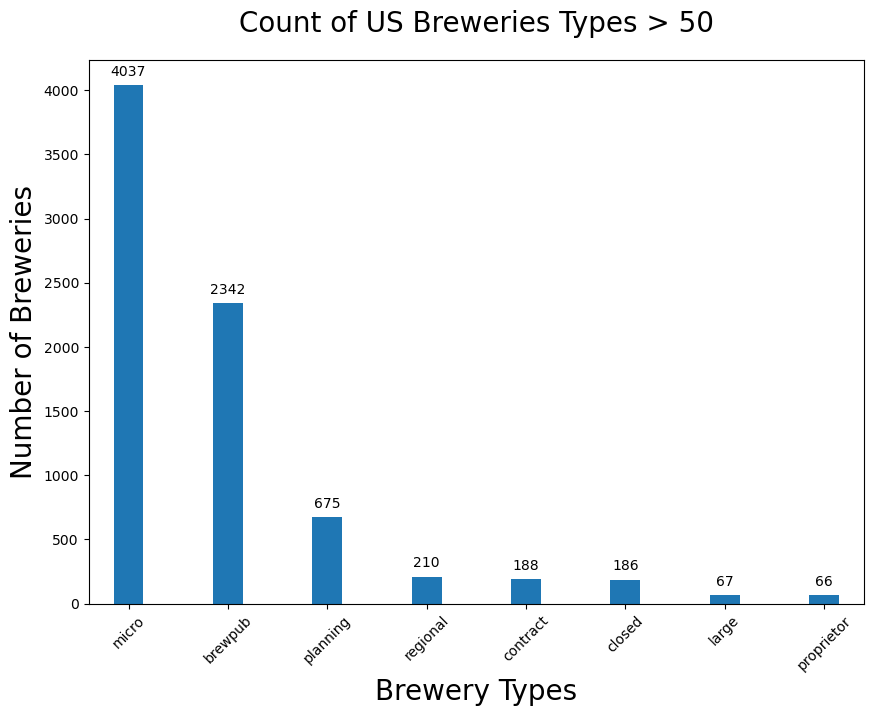

In [27]:
# Plot Brewtypes
plt.figure(figsize=(10, 8))
ax = brew_type_counts.plot(kind="bar", width=0.3)
ax.set_title("Count of US Breweries Types > 50", fontsize = 20, pad=20)
ax.set_xlabel("Brewery Types", fontsize = 20)
ax.set_ylabel("Number of Breweries", fontsize = 20)
ax.set_xticklabels(brew_type_names, rotation=45)

rects = ax.patches

# Create Number labels.
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, brew_type_counts):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 50, label, ha="center", va="bottom"
    )

# Save the figure
plt.subplots_adjust(bottom=0.2)
plt.savefig("../Outputs/Count of US Breweries Types gt 50.png")

plt.show()

# Number of Breweries per State and Total
---
    The total number of breweries listed for the US is 5515.
    Per state, California has the largest amount of breweries.
    Mississippi has the least amount of breweries
    
    From the observations, we can say that California ranks number one in the US for both consumption and for breweries
---

In [28]:
print(f'The total number of breweries listed for the US is {all_US_Brew_Count.count()}')

The total number of breweries listed for the US is 5515


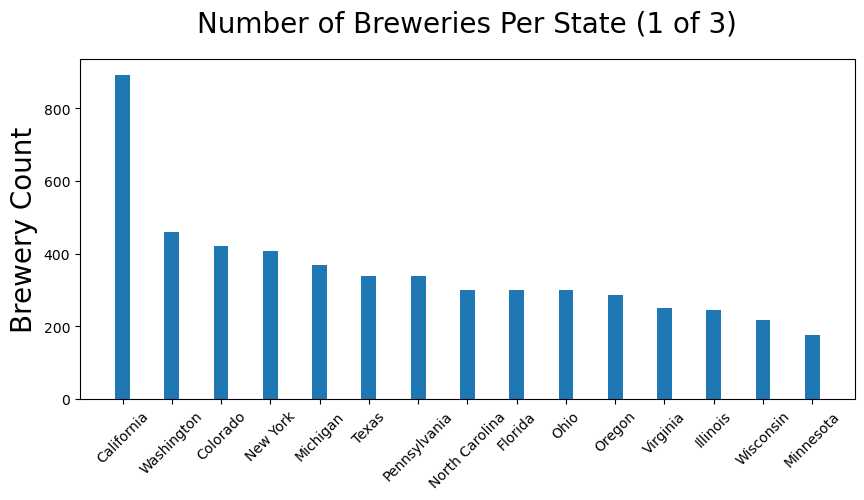

In [29]:
sub_set_of = pd.DataFrame(all_brewtypes.iloc[0:15]).reset_index()
sub_set_of

plt.figure(figsize=(10, 5))
plt.bar(sub_set_of['state_province'], sub_set_of['count'], width=0.3)
plt.title("Number of Breweries Per State (1 of 3)", fontsize = 20, pad=20)
plt.ylabel("Brewery Count", fontsize = 20) 
plt.xticks(rotation=45)
   
# Save the figure
plt.subplots_adjust(bottom=0.2)
plt.savefig("../Outputs/Number of Breweries Per State (1 of 3).png")

plt.show()

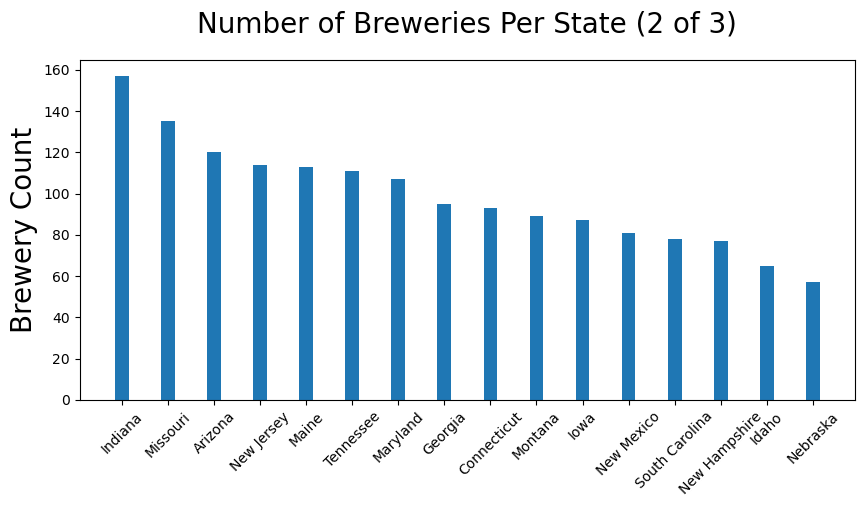

In [30]:
sub_set_of = pd.DataFrame(all_brewtypes.iloc[16:32]).reset_index()
sub_set_of

plt.figure(figsize=(10, 5))
plt.bar(sub_set_of['state_province'], sub_set_of['count'], width=0.3)
plt.title("Number of Breweries Per State (2 of 3)", fontsize = 20, pad=20)
plt.ylabel("Brewery Count", fontsize = 20) 
plt.xticks(rotation=45)

# Save the figure
plt.subplots_adjust(bottom=0.2)
plt.savefig("../Outputs/Number of Breweries Per State (2 of 3).png")

plt.show()

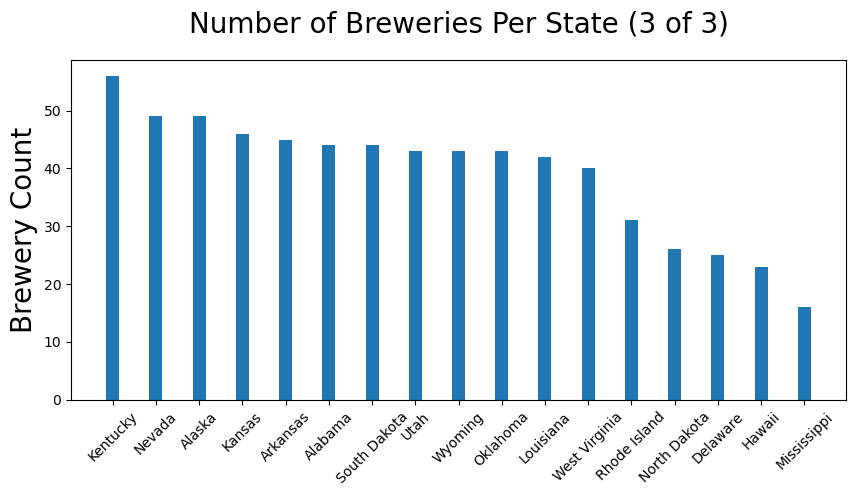

In [31]:
sub_set_of = pd.DataFrame(all_brewtypes.iloc[33:50]).reset_index()
plt.figure(figsize=(10, 5))
plt.bar(sub_set_of['state_province'], sub_set_of['count'], width=0.3)
plt.title("Number of Breweries Per State (3 of 3)", fontsize = 20, pad=20)
plt.ylabel("Brewery Count", fontsize = 20) 
plt.xticks(rotation=45)

# Save the figure
plt.subplots_adjust(bottom=0.2)
plt.savefig("../Outputs/Number of Breweries Per State (3 of 3).png")

plt.show()